In [1]:
#all required imports

%matplotlib inline
import matplotlib.pyplot as plt
import time
import numpy as np
from numpy import pi
from qutip.qip.operations import cnot
from qutip.qip.circuit import QubitCircuit
import warnings
warnings.filterwarnings("ignore")
from qutip import *
from qutip.control import *
from qutip.control.grape import plot_grape_control_fields, _overlap
from qutip.control.cy_grape import cy_overlap
from qutip.control.grape import cy_grape_unitary, grape_unitary_adaptive
from scipy.interpolate import interp1d
from qutip.ui.progressbar import TextProgressBar

In [2]:
#creating time steps for GRAPE

T = 1
times = np.linspace(0, T, 100)

In [3]:
#writing out starting state for single qubit

psi0 = basis(2, 0)
print (psi0)

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]


In [35]:
#creating transform matrix

phi=(np.pi/2)
U = ry(phi)
U

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]

In [36]:
#Define itterations and GRAPE qubit target ????????

#itterations

R = 150

#GRAPE qubit ????????????
#writing out list of H_ops
H_ops = [sigmax(), sigmay(), sigmaz()]

#Labels for the graph
H_labels = [r'$u_{x}$',
            r'$u_{y}$',
            r'$u_{z}$',
        ]

#writing the qubit drift hamiltonian
H0 = 1 * pi * sigmaz() 

print (H0)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 3.14159265  0.        ]
 [ 0.         -3.14159265]]


In [37]:
#definiting U0 ??????

u0 = np.array([np.random.rand(len(times)) * 2 * pi * 0.005 for _ in range(len(H_ops))])
u0 = [np.convolve(np.ones(10)/10, u0[idx,:], mode='same') for idx in range(len(H_ops))]

In [38]:
#doing GRAPE!
result = cy_grape_unitary(U, H0, H_ops, R, times, u_start=u0, eps=2*pi/T, phase_sensitive=False,
                          progress_bar=TextProgressBar())

10.0%. Run time:   5.20s. Est. time left: 00:00:00:46
20.0%. Run time:  10.05s. Est. time left: 00:00:00:40
30.0%. Run time:  14.80s. Est. time left: 00:00:00:34
40.0%. Run time:  19.61s. Est. time left: 00:00:00:29
50.0%. Run time:  24.37s. Est. time left: 00:00:00:24
60.0%. Run time:  29.19s. Est. time left: 00:00:00:19
70.0%. Run time:  33.93s. Est. time left: 00:00:00:14
80.0%. Run time:  38.76s. Est. time left: 00:00:00:09
90.0%. Run time:  43.52s. Est. time left: 00:00:00:04
Total run time:  47.97s


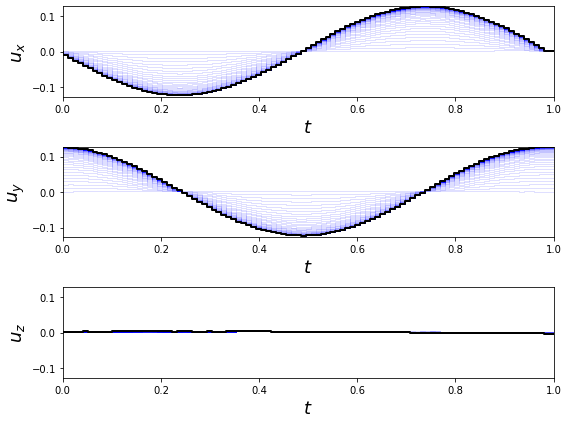

In [39]:
#Plotting pulse sqeuences from GRAPE
plot_grape_control_fields(times, result.u[:,:,:] / (2 * pi), H_labels, uniform_axes=True);
plt.savefig("1qubitpluse.pdf")


In [40]:
#Printing result U, called U_GRAPE in our report
result.U_f.tidyup(1e-5)

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = False
Qobj data =
[[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]

In [41]:
#Printing the final GRAPE state to compare
final=result.U_f*psi0
final

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[-0.70710678]
 [-0.70710678]]

In [45]:
idealfinal=U*psi0
idealfinal

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.70710678]
 [0.70710678]]

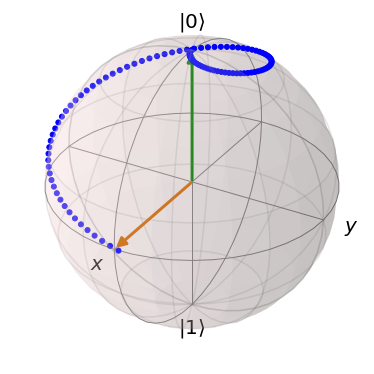

In [46]:
#plotting bloch sphere
c_ops = []
e_ops = [sigmax(), sigmay(), sigmaz()]
U_f_numerical = propagator(result.H_t, times, c_ops, args={})
me_result = mesolve(result.H_t, psi0, times, c_ops, e_ops)
b = Bloch()
b.add_points(me_result.expect)
b.add_states(psi0)
b.add_states(idealfinal)
b.show()


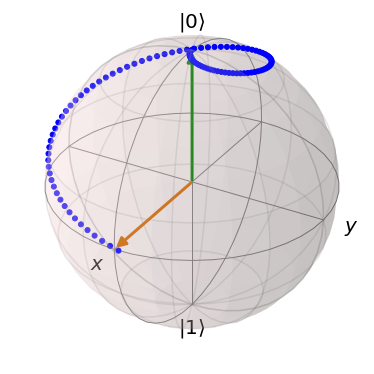

In [47]:
b = Bloch()

b.add_points(me_result.expect)

b.add_states(psi0)
b.add_states(final)


b.show()